In [1]:
import numpy as np
import pandas as pd
import lux
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import new_wrangle

In [2]:
plt.style.use("ggplot")

In [3]:
df = new_wrangle.acquire_data()

In [4]:
df = new_wrangle.wrangle_walmart()

/Users/albertopuentes/Desktop/codeup-data-science/capstone/new_wrangle.py:65: FutureWarning:weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


In [5]:
df.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/executor/PandasExecutor.py:462: UserWarning:
Lux detects that attributes ['month', 'year', 'weekday'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['month'] = pd.to_datetime(df['month'], format='<replace-with-datetime-format>')
	df['year'] = pd.to_datetime(df['year'], format='<replace-with-datetime-format>')
	df['weekday'] = pd.to_datetime(df['weekday'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If weekday is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'weekday':'quantitative'})
/opt/home

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
#train test split
X_train, y_train, X_test, y_test = new_wrangle.train_test(df,'weekly_sales')

X_train -> (5445, 20)
X_test -> (990, 20)


In [7]:
X_train.head()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/executor/PandasExecutor.py:462: UserWarning:
Lux detects that attributes ['month', 'year', 'weekday'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Datetime objects.
For example, you can convert a Year attribute (e.g., 1998, 1971, 1982) using pd.to_datetime by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['month'] = pd.to_datetime(df['month'], format='<replace-with-datetime-format>')
	df['year'] = pd.to_datetime(df['year'], format='<replace-with-datetime-format>')
	df['weekday'] = pd.to_datetime(df['weekday'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If weekday is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'weekday':'quantitative'})
/opt/home

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Data aggregated across all features

### Visualizing Target Versus Features

Text(0.5, 1.0, 'Average Temperature by Month')

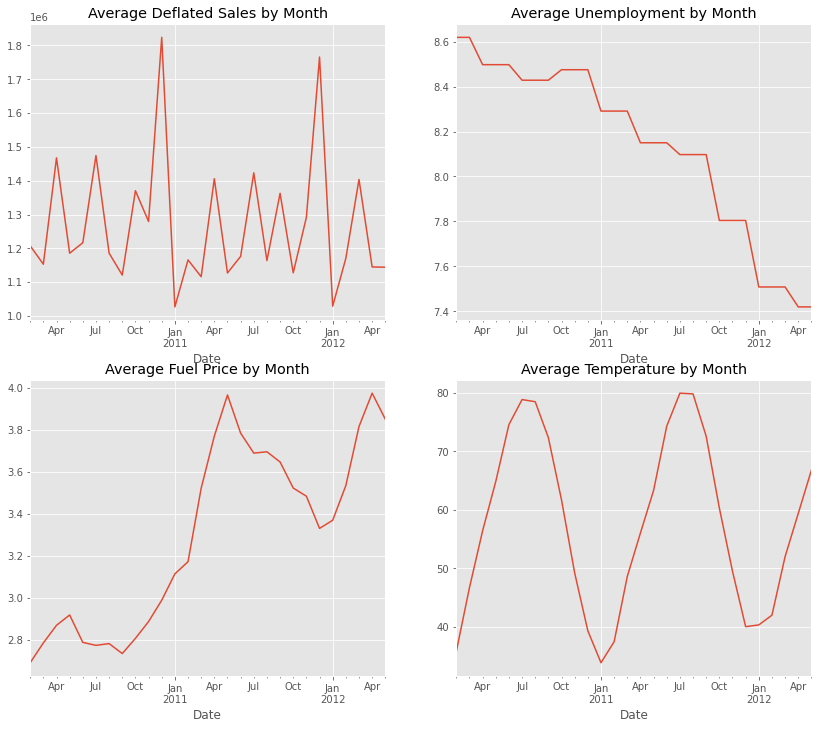

In [8]:
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').sum().plot()
plt.xticks(rotation=0)
plt.title('Average Deflated Sales by Month')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Unemployment by Month')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Fuel Price by Month')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').mean().plot()
plt.xticks(rotation=0)
plt.title('Average Temperature by Month')

In [9]:
X_train.loc['2010-02-05'].deflated_series.sum()

315248.86000000004

***
Takeaways from aggregate monthly resampling: 
* deflated sales spike significantly over the Nov-Dec months only to nosedive to annual lows in January
    * a rebound in sales during Feb after cyclical lows in Jan 
        * much milder spikes appear consistent in the months of June and August
* avg unemployment shows a clear declining trend whild avg fuel price shows a clear rising trend
* seasonality in both the avg deflated sales and avg temperature occurs over an annual basis
***

### Visualizing Target and Feature Delta

Text(0.5, 1.0, 'Average Monthly YoY change - Temperature ')

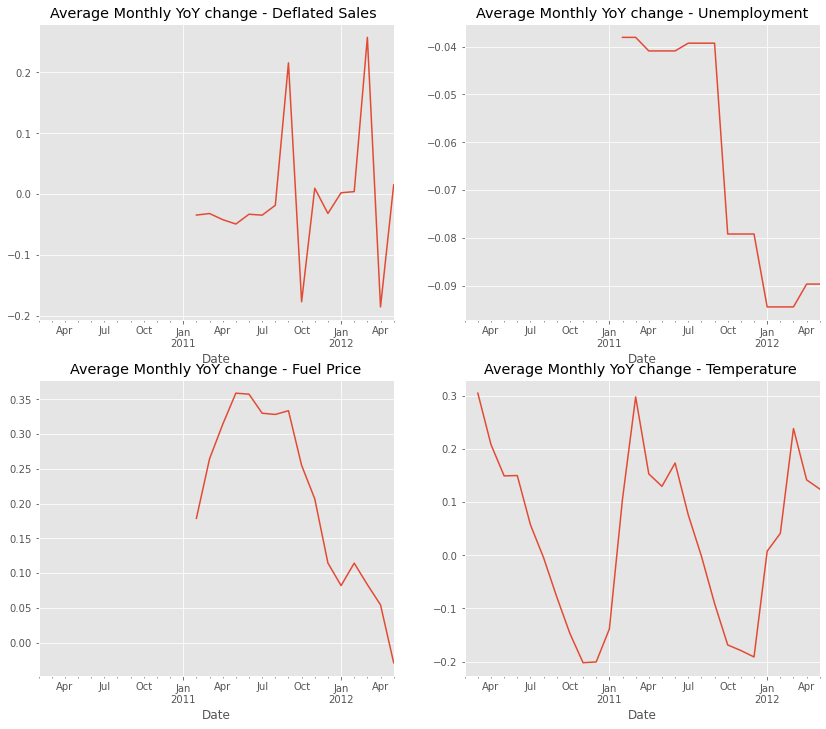

In [10]:
# Year over year changes
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').sum().pct_change(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Deflated Sales ')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').mean().pct_change(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Unemployment')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').mean().pct_change(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Fuel Price')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').mean().pct_change().plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Temperature ')

***
Takeaways: 
* avg year-over-year delta on deflated sales appears to have no trend or seasonality
* ang yoy delta on uneployment and fuel prices hav a negative trend
    * hypothesis: price declines lead to higher sales; is there a lag
***

Text(0.5, 1.0, 'Average Monthly MoM change - Temperature ')

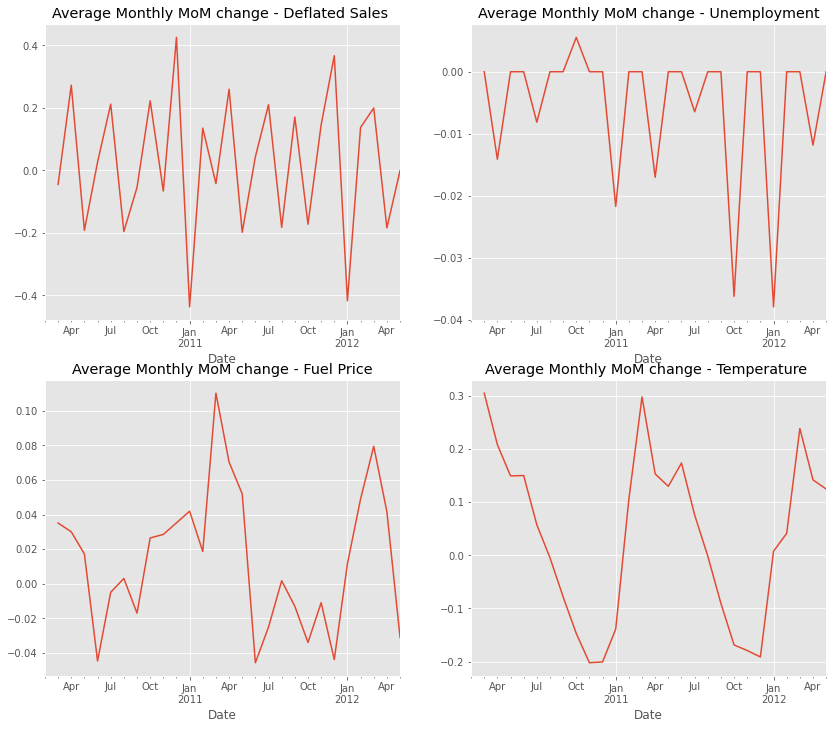

In [11]:
# Month over month changes
plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
X_train.deflated_series.resample('M').sum().pct_change(1).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Deflated Sales ')

plt.subplot(2, 2, 2)
X_train.unemployment.resample('M').mean().pct_change(1).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Unemployment')

plt.subplot(2, 2, 3)
X_train.fuel_price.resample('M').mean().pct_change(1).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Fuel Price')

plt.subplot(2, 2, 4)
X_train.temperature.resample('M').mean().pct_change(1).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly MoM change - Temperature ')

***
Takeaways: 
* the month-over-month deltas show plenty of seasonality but no clear trends identifiable from visuals
***

In [12]:
piv = pd.pivot_table(X_train, index=['month'],columns=['year'], values=['deflated_series'])
piv

/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/vis/VisList.py:317: UserWarning:
The following issues are ecountered when validating the parsed intent:
- The input attribute 'month' does not exist in the DataFrame. 
  Please check your input intent for typos.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py:918: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/core/frame.py:628: UserWarning:Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/core/frame.py", line 590, in _ipython_display_
    self.maintain_recs()
  File "/opt/homebrew/anaconda3/lib/python3.8/site-packages/lux/core/frame.py", line 425, in maintain_recs
    rec_df._append_rec(rec_infolist, column_group(rec_df))
  File "/opt/homebrew/anaconda3/

deflated_series                          
year                 2010         2011         2012
month                                              
April         6522.296356  6248.072089  6361.075889
August        6587.648167  6466.025667          NaN
December      8105.852444  7847.302044          NaN
February      6707.779722  6476.167278  6502.424556
January               NaN  5704.554833  5716.699556
July          6552.863111  6325.606578          NaN
June          6758.853722  6534.663667          NaN
March         6405.899444  6200.895111  6238.985556
May           6586.807667  6262.280556  6356.759500
November      7107.572556  7175.682111          NaN
October       6090.556933  6265.123500          NaN
September     6227.415056  6056.688889          NaN

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

<Figure size 1008x576 with 0 Axes>

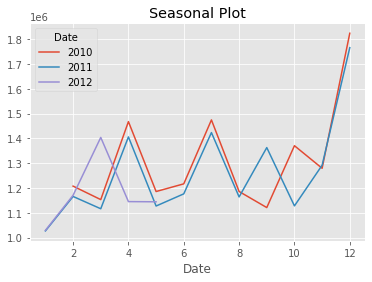

In [13]:
plt.figure(figsize=(14, 8)) 
X_train.deflated_series.groupby([X_train.index.year, X_train.index.month]).sum().unstack(0).plot(title='Seasonal Plot')

***
Takeaways:
* Seasonal patterns hold across years
    * March/April 2012, September/October 2011 act in opposition
***

### Visualizing Target Lags

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

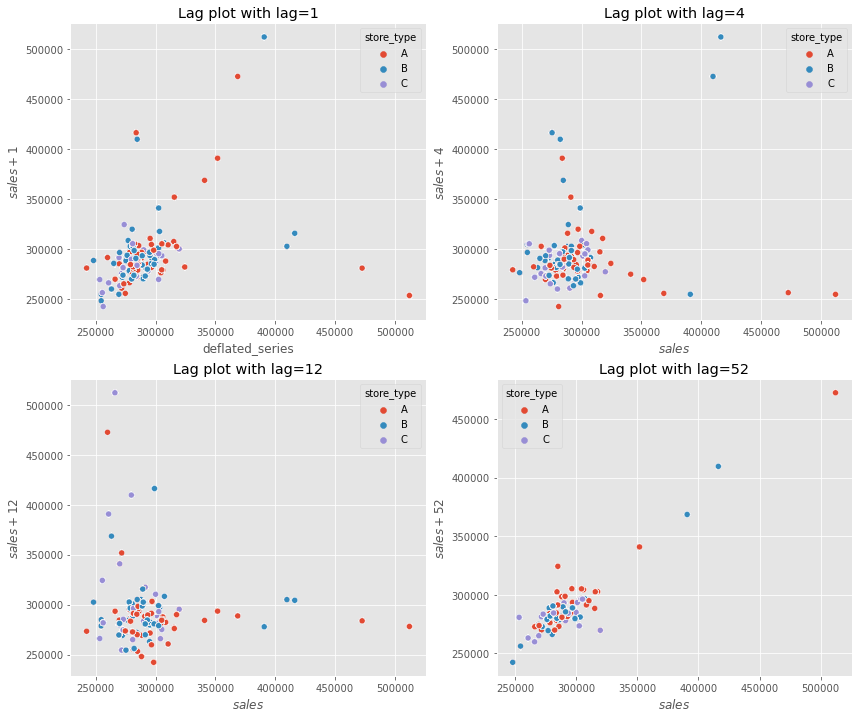

In [14]:
# Various Target Lag plots

plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('sum'), X_train.groupby('Date').deflated_series.agg('sum').shift(-1), hue=X_train.store_type)
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('sum'), X_train.groupby('Date').deflated_series.agg('sum').shift(-4), hue=X_train.store_type)
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('sum'), X_train.groupby('Date').deflated_series.agg('sum').shift(-12), hue=X_train.store_type)
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(X_train.groupby('Date').deflated_series.agg('sum'), X_train.groupby('Date').deflated_series.agg('sum').shift(-52), hue=X_train.store_type)
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

#### Investigate anomalies in the lag1 data

In [15]:
# Separate aggregated weekly sales data into current and lagged series
m = pd.Series(X_train.groupby('Date').deflated_series.agg('sum'), name = 'm')
n = pd.Series(X_train.groupby('Date').deflated_series.agg('sum').shift(-1), name = 'n')

In [16]:
# concat the series into a dataframe and extract observations that appear to violate the linear relationship
pd.set_option('display.max_rows', None)
df_lag1 = pd.concat([m, n], axis=1)
df_lag1[df_lag1.m>400000]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
df_lag1[df_lag1.n>400000]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

***
Takeways:
* There is a clear linear correlation when lagging the data on an annual basis (52 weeks)
* There also appears to be some correlation when lagging on a monthly basis
    * outliers appear evenly distributed across store size groupings and appear to mirror each other suggesting the same time periods may be mirrored
        * perhaps these are due to the holiday periods; check to see if any possibility of addressing
            * CONFIRMED: the outliers occur in consecutive dates surrounding the Thanksgiving and Christmas holidays.  Specifically, [2010-11-19, 2010-11-26, 2010-12-17, 2010-12-24, 2011-11-18, 2011-11-25, 2011-12-16, 2011-12-23]
***


In [18]:
# Separate train by store type
a = X_train[X_train.store_type == 'A']
b = X_train[X_train.store_type == 'B']
c = X_train[X_train.store_type == 'C']

a.shape, b.shape, c.shape

((2420, 20), (1815, 20), (1210, 20))

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

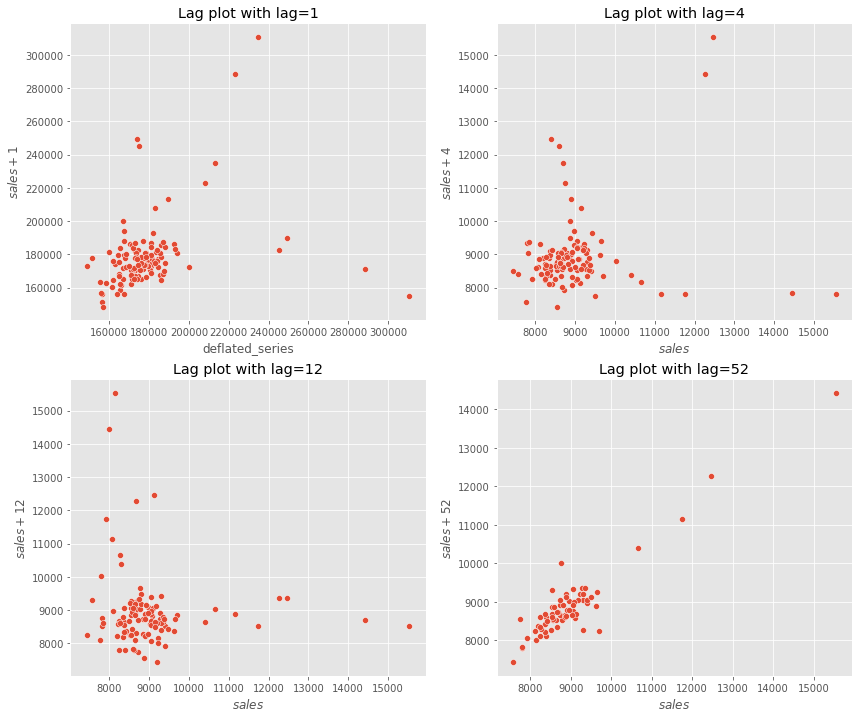

In [19]:
# Various Target Lag plots


plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(a.groupby('Date').deflated_series.agg('sum'), a.groupby('Date').deflated_series.agg('sum').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(a.groupby('Date').deflated_series.agg('mean'), a.groupby('Date').deflated_series.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

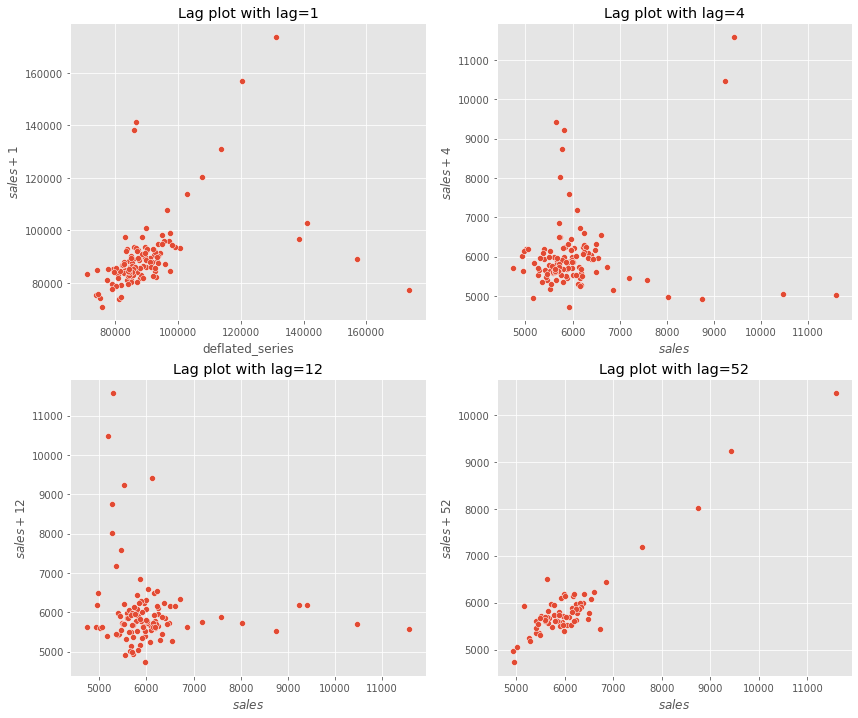

In [20]:
# Various Target Lag plots

plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(b.groupby('Date').deflated_series.agg('sum'), b.groupby('Date').deflated_series.agg('sum').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(b.groupby('Date').deflated_series.agg('mean'), b.groupby('Date').deflated_series.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/opt/homebrew/anaconda3/lib/python3.8/site-packag

Text(0.5, 1.0, 'Lag plot with lag=52')

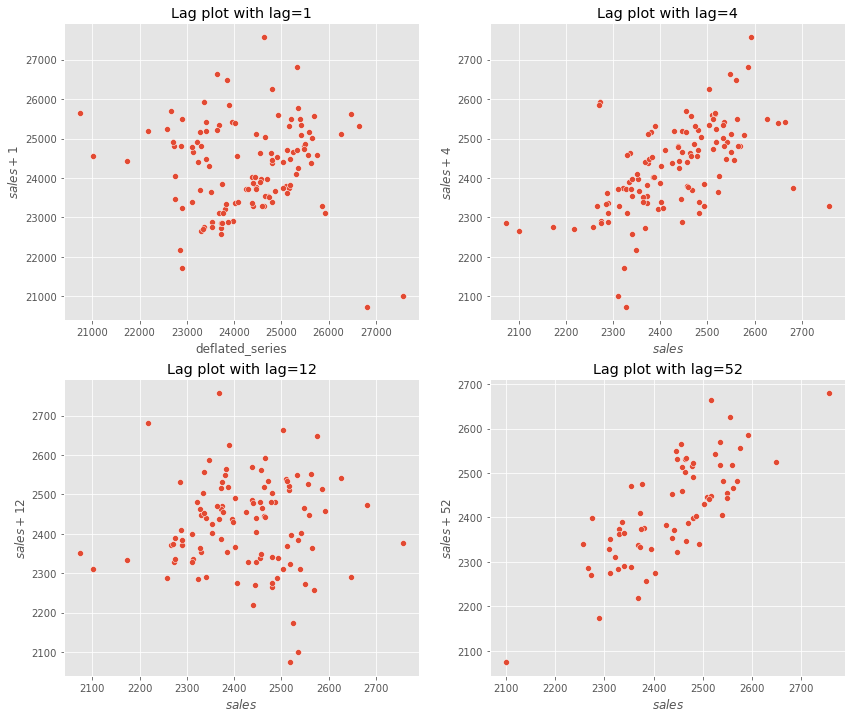

In [21]:
# Various Target Lag plots



plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(c.groupby('Date').deflated_series.agg('sum'), c.groupby('Date').deflated_series.agg('sum').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(c.groupby('Date').deflated_series.agg('mean'), c.groupby('Date').deflated_series.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

***
Takeaways:
* separating the sales data by store size continues to support the overall findings above
* NOTEWORTHY: sales in the smaller stores doesn't appear to hold as strong of a correlation as the larger stores especially when examining the data lagged on a weekly basis
    * interstingly, this data does suggest some linear correlation over a monthly lag (4 weeks) where the larger stores do not
***   

### AutoCorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

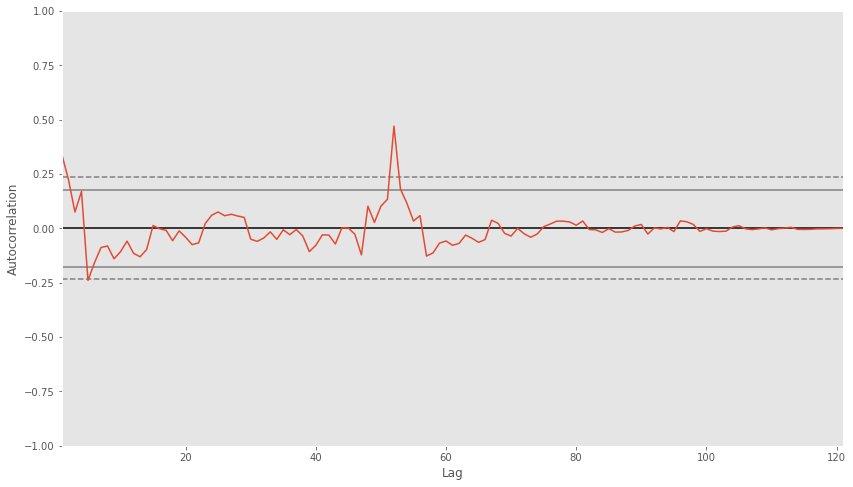

In [27]:
plt.figure(figsize=(14, 8)) 
pd.plotting.autocorrelation_plot(X_train.deflated_series.resample('W').mean())

***
Takeaways:
* For the most part, the chart is showing little sales autocorrelation outiside of the 1 week and 52 week lags we identified earlier
***

In [28]:
y = X_train.deflated_series.resample('M').sum()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head(15)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Date'>

<Figure size 1008x576 with 0 Axes>

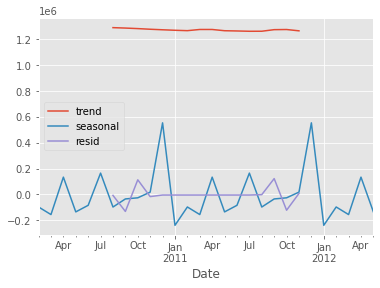

In [29]:
plt.figure(figsize=(14, 8)) 
decomposition.iloc[:, 1:].plot()

(array([14700., 14791., 14883., 14975., 15065., 15156., 15248., 15340.,
        15431.]),
 [Text(14700.0, 0, '2010-04'),
  Text(14791.0, 0, '2010-07'),
  Text(14883.0, 0, '2010-10'),
  Text(14975.0, 0, '2011-01'),
  Text(15065.0, 0, '2011-04'),
  Text(15156.0, 0, '2011-07'),
  Text(15248.0, 0, '2011-10'),
  Text(15340.0, 0, '2012-01'),
  Text(15431.0, 0, '2012-04')])

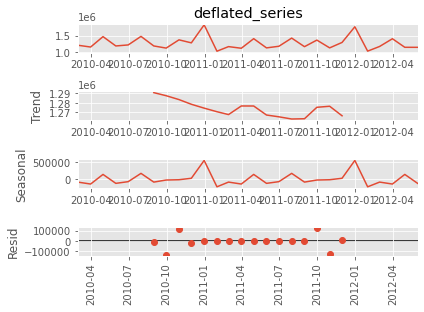

In [30]:
result.plot()
plt.xticks(rotation = 90)

***
Decomposition Takeaways:
* No real long term trend identifiable
    * the chart would suggest different but the scale exaggerates the data
* Again, seasonality around the holidays identified
* Residuals oddly reciprocated at each tail.  I do not understand
***

ValueError: Using `title` of type `list` is not supported unless `subplots=True` is passed

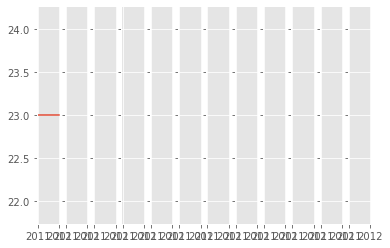

In [26]:
table = X_train.groupby([X_train.index.year, X_train.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

In [ ]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, y = 'deflated_series', x = 'fuel_price', hue = 'store_type' )
plt.title('Do Fuel Prices have any correlation with weekly sales?', fontsize = 15)
plt.show()

In [ ]:
A = a.groupby('Date')
B = b.groupby('Date')
C = c.groupby('Date')

In [ ]:
Asr = C.deflated_series.resample('M').sum().pct_change(12).plot()
Afr = C.fuel_price.resample('M').mean().pct_change(12).plot()

In [ ]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = A, y = 'deflated_series', x = 'fuel_price')
plt.title('Do Fuel Prices have any correlation with weekly sales?', fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = A, y = 'deflated_series', x = 'fuel_price')
plt.title('Do Fuel Prices have any correlation with weekly sales?', fontsize = 15)
plt.show()


X_train.deflated_series.resample('M').last().diff(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Deflated Sales ')

X_train.fuel_price.resample('M').last().diff(12).plot()
plt.xticks(rotation=0)
plt.title('Average Monthly YoY change - Fuel Price')

In [ ]:

plt.figure(figsize=(14, 12)) # (width, height)

plt.subplot(2, 2, 1)
sns.scatterplot(a.resample('w').deflated_series.agg('sum'), a.resample('w').fuel_price.agg('mean').shift(-1))
plt.ylabel('$sales + 1$')
plt.title('Lag plot with lag=1')

plt.subplot(2, 2, 2)
sns.scatterplot(a.resample('w').deflated_series.agg('sum'), a.resample('w').fuel_price.agg('mean').shift(-4))
plt.xlabel('$sales$')
plt.ylabel('$sales + 4$')
plt.title('Lag plot with lag=4')

plt.subplot(2, 2, 3)
sns.scatterplot(a.resample('w').deflated_series.agg('sum'), a.resample('w').fuel_price.agg('mean').shift(-12))
plt.xlabel('$sales$')
plt.ylabel('$sales + 12$')
plt.title('Lag plot with lag=12')

plt.subplot(2, 2, 4)
sns.scatterplot(a.resample('w').deflated_series.agg('sum'), a.resample('w').fuel_price.agg('mean').shift(-52))
plt.xlabel('$sales$')
plt.ylabel('$sales + 52$')
plt.title('Lag plot with lag=52')

### Prophet

In [31]:
from prophet import Prophet
import plotly.graph_objs as go

In [32]:
X_train.deflated_series.groupby('Date').agg('sum').tail()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
#Prophet requires start with a dataframed that includes DS (dates) & Y (target) columns

In [34]:
prophet = X_train.deflated_series.groupby('Date').agg('sum').reset_index()
prophet = prophet.rename(columns={'Date':'ds', 'deflated_series':'y'})
prophet.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [35]:
m = Prophet()
m.fit(prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods=365)
future.tail(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

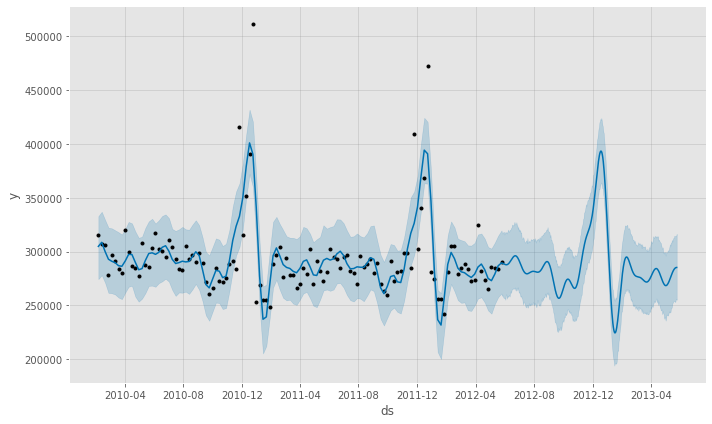

In [38]:
fig1 = m.plot(forecast)

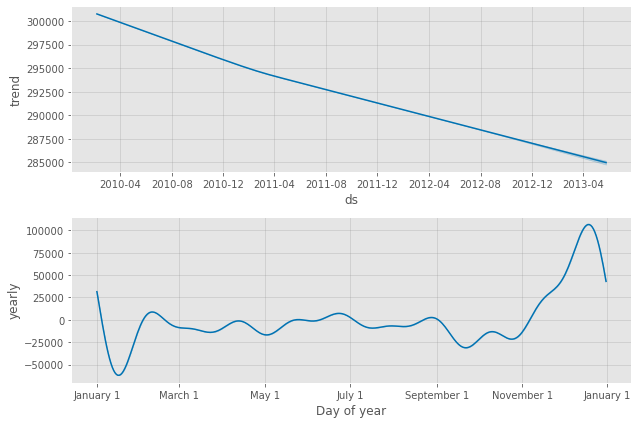

In [39]:
fig2 = m.plot_components(forecast)

In [41]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [43]:
plot_components_plotly(m, forecast)